# Карта метода

## 1. Название метода  
Метод главных компонент (Principal Component Analysis, PCA)

## 2. Описание метода  
Его применяют для уменьшения размерности континуальных данных (температура, вес, уровень гемоглобина в крови). Он позволяет снизить потерю информации при уменьшении размерности.  
PCA применяется, если некоторые признаки коррелируют друг с другом. Он создает из них независимые линейные комбинации. Часто дисперсии получившихся признаков сильно отличаются. В таком случае признаки с низкой дисперсией можно отбросить, потому что они менее информативны.

Этот метод решает две задачи: создает более информативные признаки и уменьшает шум в данных.  
PCA помогает нам выявлять закономерности в данных на основе корреляции между функциями. В двух словах: PCA стремится найти направления максимальной дисперсии в многомерных данных и проецирует их на новое подпространство с такими же или меньшими размерами, чем исходное.

## 3. Механизм работы
Основные шаги метода PCA:
* Стандартизация данных: Если признаки измеряются в разных единицах или имеют разные диапазоны значений, данные стандартизируются путем вычитания среднего значения и деления на стандартное отклонение.  
* Вычисление ковариационной матрицы: Для стандартизированных данных вычисляется матрица ковариации, которая показывает, какие признаки вместе изменяются.
* Вычисление собственных векторов и собственных значений: Собственные векторы и собственные значения ковариационной матрицы определяют направления и величину максимальной изменчивости данных.  
* Выбор главных компонент: Главные компоненты - это линейные комбинации исходных признаков, которые описывают максимальное количество изменчивости данных. Они соответствуют собственным векторам, имеющим наибольшие собственные значения.  
* Проекция данных на новое пространство признаков: Данные проецируются на пространство, определенное главными компонентами, чтобы получить новый набор признаков.  

Часто при применении PCA происходит сокращение размерности данных путем отбрасывания наименее информативных главных компонент, что позволяет снизить вычислительную сложность и уменьшить шум в данных, выделить наиболее важные коррелирующие с таргетом признаки.

<mark> StandardScaler </mark> - метод стандартизации значений данных.  
Масштабирования, при котором данные не масштабируются путем преобразования статистического распределения данных в следующий формат:  
z=X−µ /σ  
,где x представляет исходное значение объекта, μ - среднее значение объекта, σ - стандартное отклонение, а z - стандартизированное объекта.  
Таким образом, весь набор данных масштабируется вместе с нулевым значением и единичной дисперсией.

# Реализация

## Импорт библиотек

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import trange

In [8]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

## Чтение данных

In [9]:
df = pd.read_excel('../data/dataset.xlsx')
dataset = df.copy()

## Предобработка

In [10]:
categorial_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

In [11]:
dataset[categorial_features] = pd.get_dummies(dataset[categorial_features], drop_first=True)

X = dataset.drop(['Больной'], axis=1)
y = dataset['Больной']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=SEED,
                                                    stratify=y,
                                                    shuffle=True)

In [12]:
scaler = StandardScaler()

X_std = X.copy()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler.fit(X_train[numerical_features])

X_train_std[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_std[numerical_features] = scaler.transform(X_test[numerical_features])
X_std[numerical_features] = scaler.transform(X[numerical_features])

## Сокращение измерений

### 2 измерения

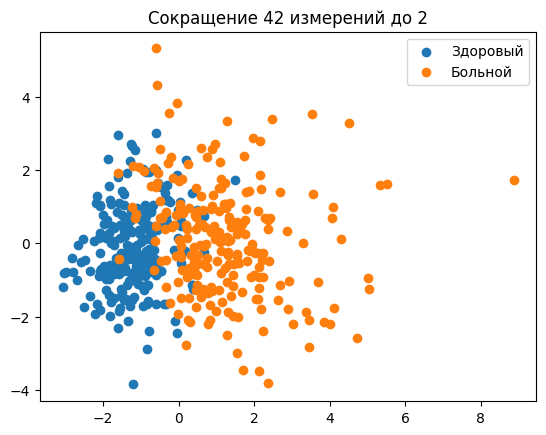

In [48]:
model = PCA(n_components=2, random_state=SEED)
components = model.fit_transform(X_std, y)

plt.scatter(components[y == 0, 0], components[y == 0, 1], c='C0', label='Здоровый')
plt.scatter(components[y == 1, 0], components[y == 1, 1], c='C1', label='Больной')
plt.title(f'Сокращение {X.shape[1]} измерений до 2')
plt.legend()
plt.show()

### 3 измерения

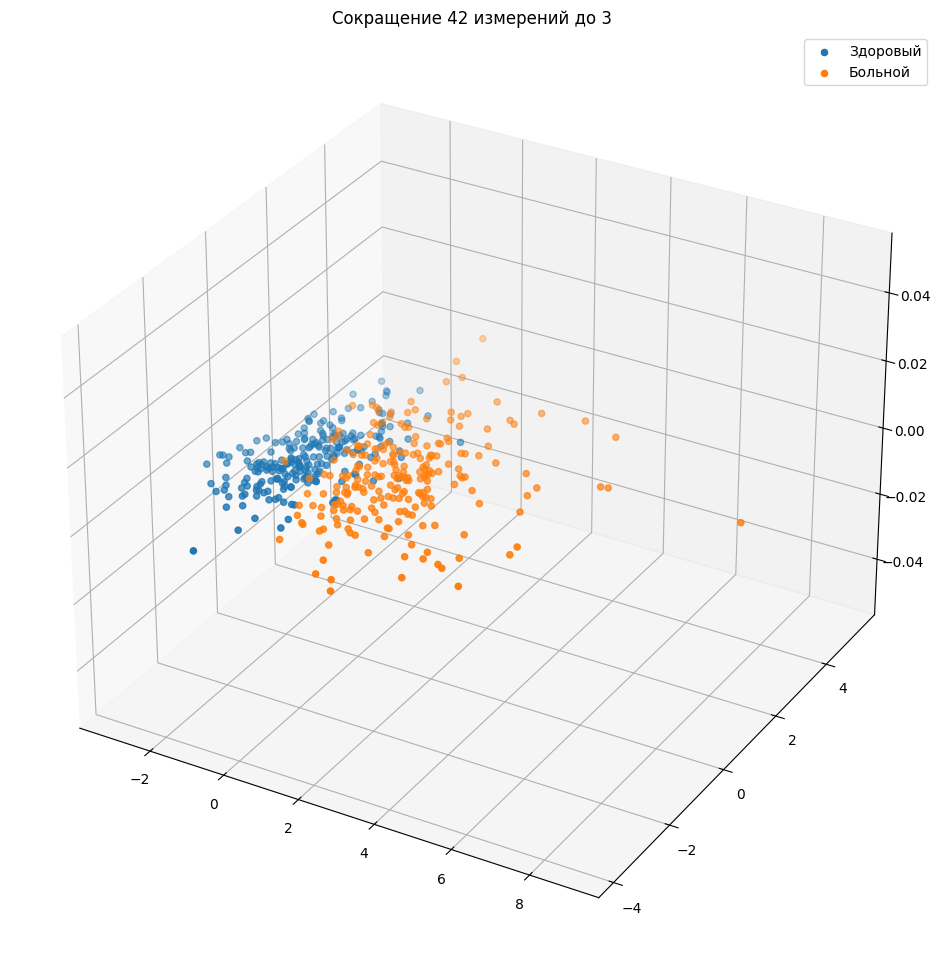

In [49]:
model = PCA(n_components=3, random_state=SEED)
components = model.fit_transform(X_std, y)

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(components[y == 0, 0], components[y == 0, 1], c='C0', label='Здоровый')
ax.scatter(components[y == 1, 0], components[y == 1, 1], c='C1', label='Больной')
plt.title(f'Сокращение {X.shape[1]} измерений до 3')
plt.legend()
plt.show()

## Вычисление оптимального количества измерений

In [40]:
var_ratio = []
for num in trange(df.shape[1]):
  pca = PCA(n_components=num)
  pca.fit_transform(X_std, y)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 259.08it/s]


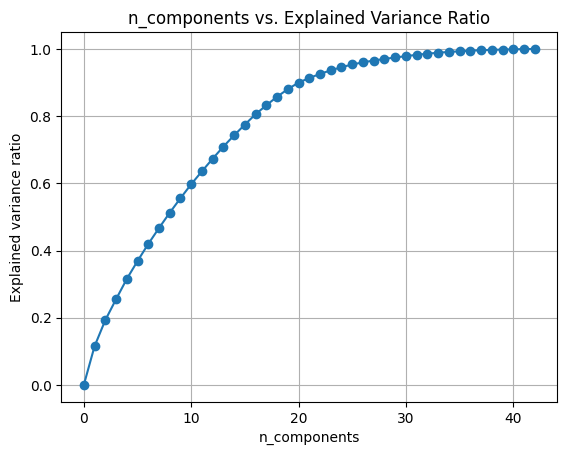

In [41]:
plt.grid()
plt.plot(range(df.shape[1]),var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio');

Данные не всегда разделены чётко. Один из способов поиска числа кластеров:  
При выполнении PCA обычно указывается желаемое количество компонентов (n_components). Затем explained_variance_ratio_ атрибут объекта PCA предоставляет массив, где каждый элемент представляет долю дисперсии набора данных, объясняемую каждым основным компонентом. Этот массив упорядочен от наибольшей к наименьшей объясненной дисперсии.

Итак, n_components сообщает сколько основных компонентов вы сохраняете, в то время как explained_variance_ratio_ сообщает вам, какая разница в исходных данных объясняется каждым из этих компонентов. Эти две части информации имеют решающее значение для понимания того, какой объем информации сохраняется после уменьшения размерности и насколько хорошо сокращенное представление отражает изменчивость исходных данных.

## Парное столкновение признаков многомерного PCA

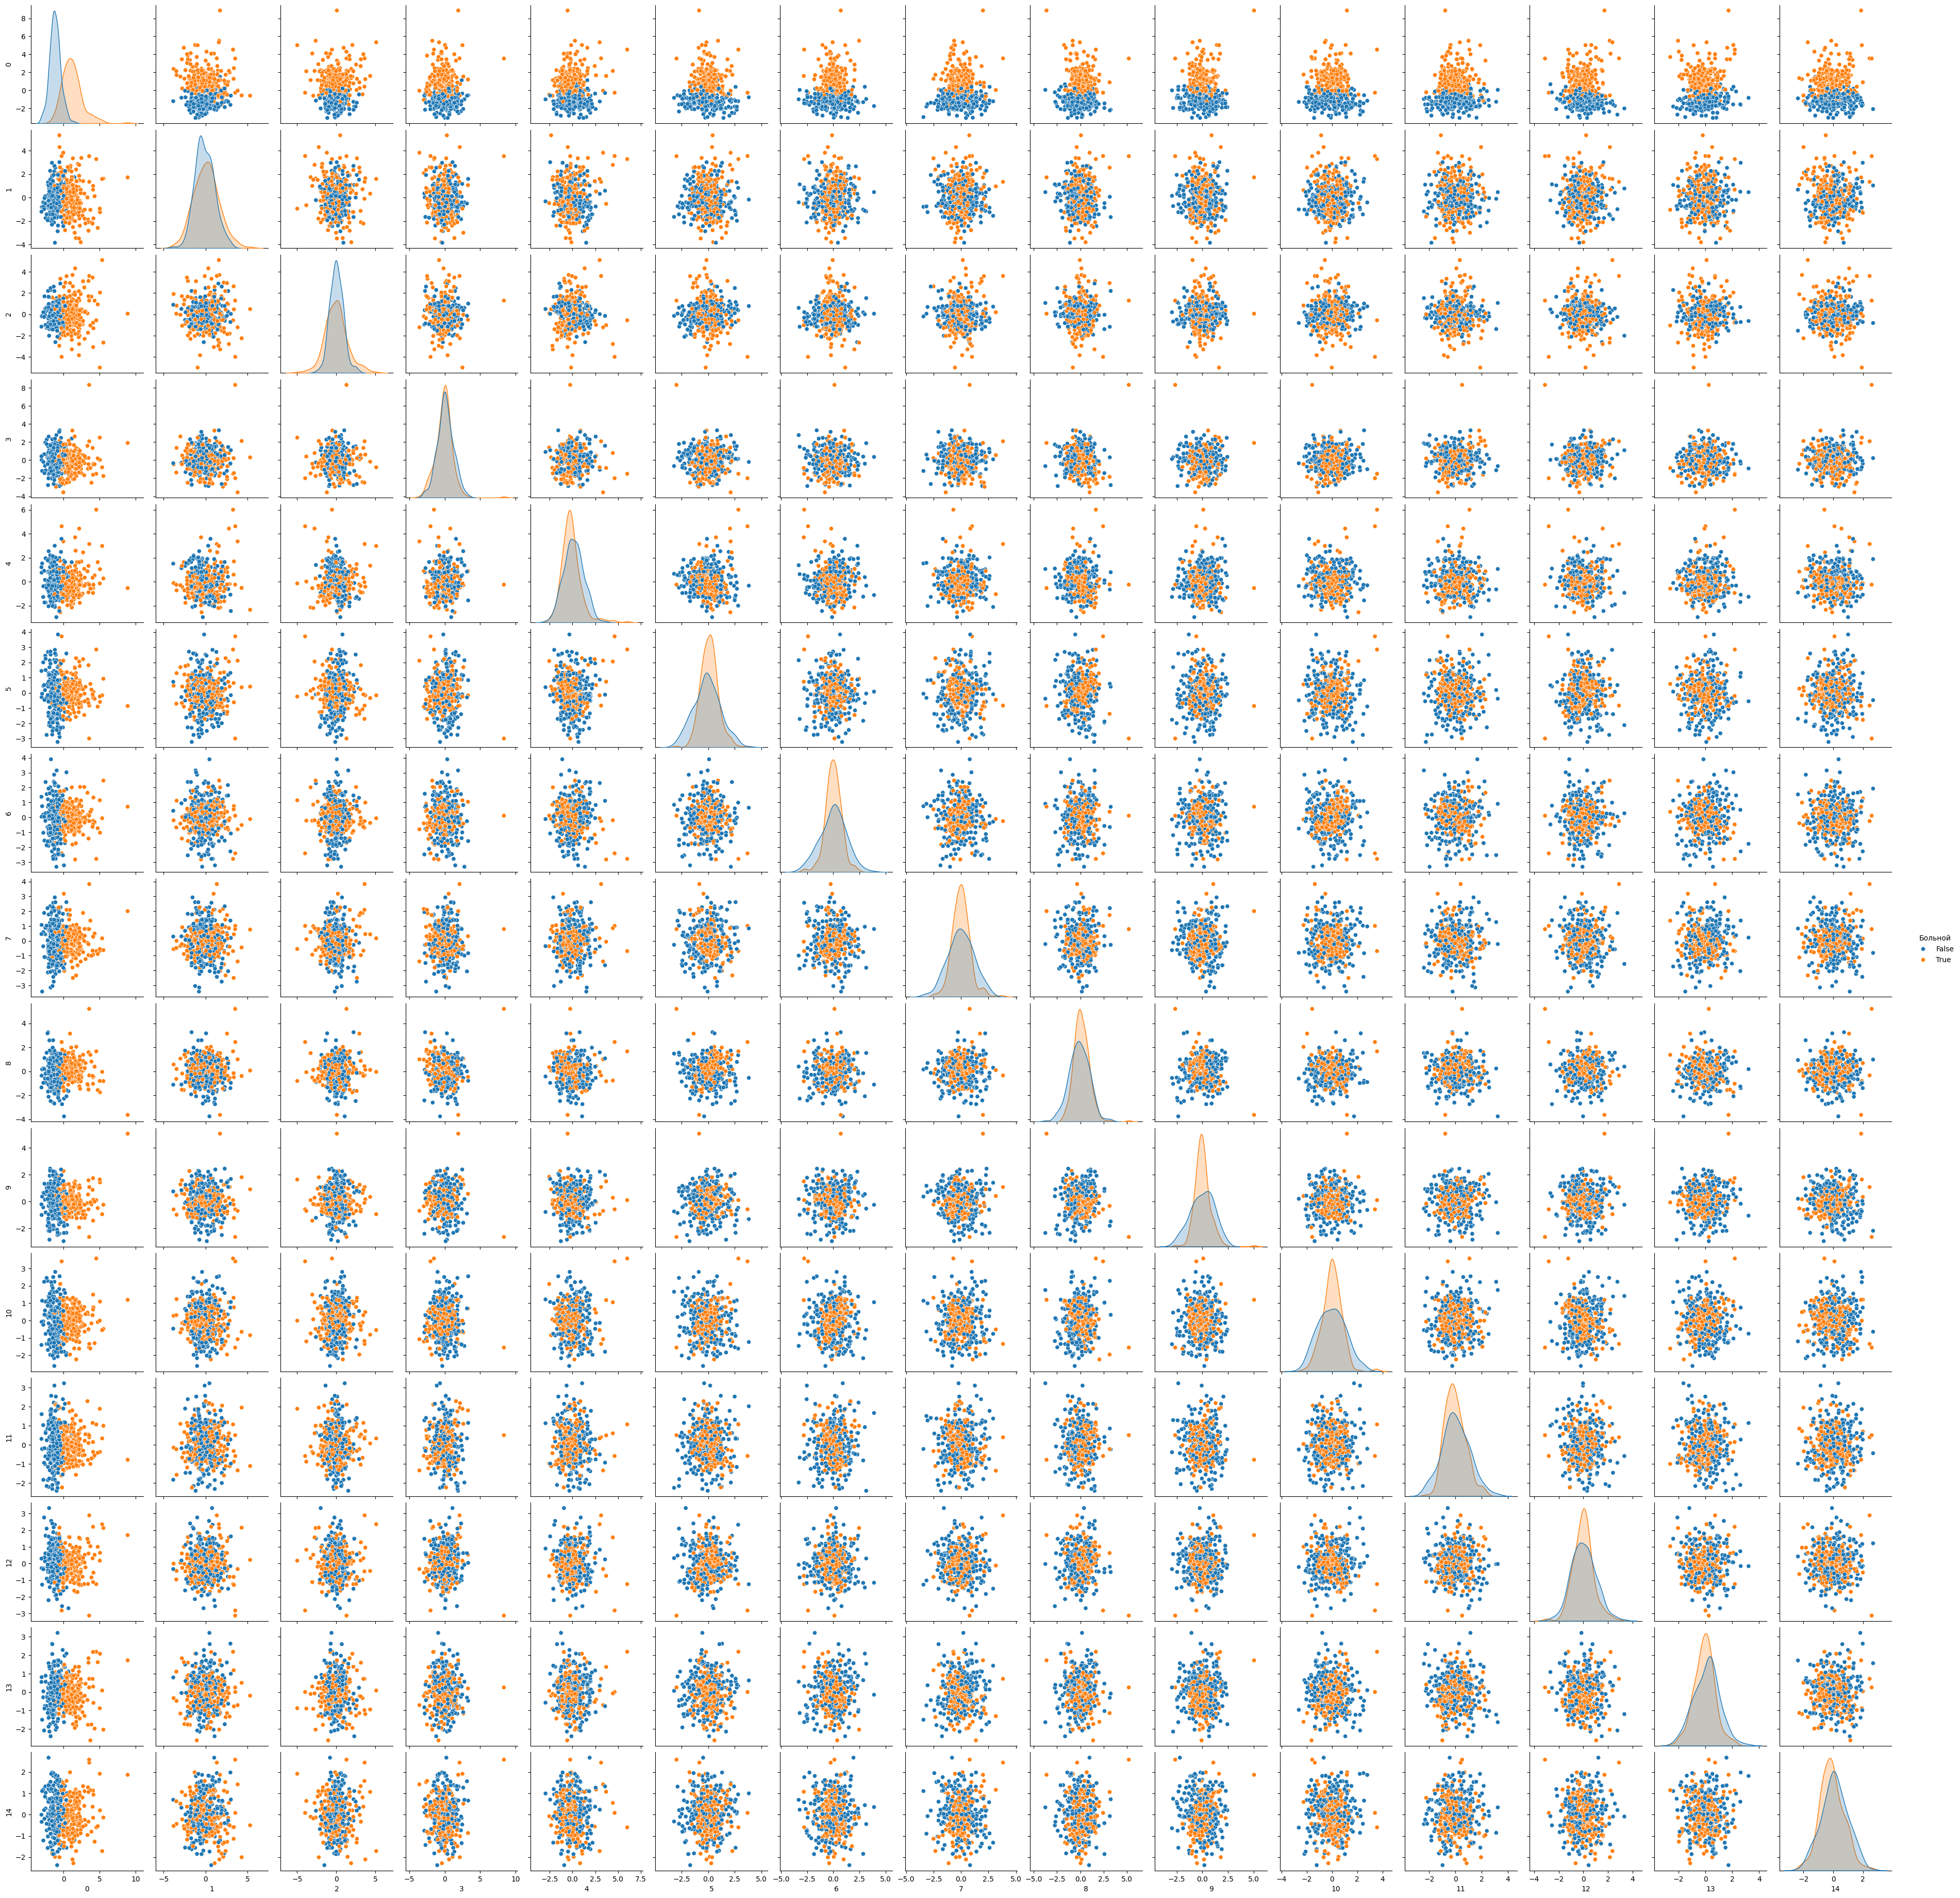

In [42]:
pca = PCA(n_components=15)
components = pca.fit_transform(X_std, y)
data = pd.DataFrame(components)
data['Больной'] = df['Больной']
sns.pairplot(data=data, hue='Больной');

In [43]:
pca.components_ # векторное представление 15 компонент

array([[-4.01094945e-02,  5.58759742e-03,  1.09041194e-01,
        -7.54918018e-02,  2.41587017e-02,  1.71251029e-02,
         1.76889404e-02,  5.54220825e-02, -3.11682270e-02,
         7.23666329e-02,  5.21505400e-03,  2.31135793e-02,
         2.00658781e-02,  7.67175619e-02,  3.90445741e-02,
        -1.12125737e-02, -6.09301548e-02,  1.63726859e-02,
         1.18745214e-02,  1.37925250e-02,  1.03780722e-02,
         4.76194531e-02,  1.58435920e-02,  9.24391543e-02,
        -2.77170923e-01, -3.88843844e-02,  3.80493277e-01,
         3.77362501e-01, -1.15233844e-01, -1.19157882e-01,
         3.26453998e-01, -2.48001865e-02,  3.91129495e-02,
         7.92781111e-02, -8.67683506e-02,  2.09553047e-01,
         1.10897245e-01,  5.41752403e-02, -1.12487148e-01,
         9.29560793e-02,  4.46459789e-01,  3.88626379e-01],
       [ 1.73611083e-02, -1.00587162e-02,  1.86733831e-02,
         8.17954325e-03, -1.58291516e-01,  4.71222029e-03,
         2.80367261e-03,  1.12474217e-02,  2.45768411e-

Матрица объясненной дисперсии для каждого из измерения

In [44]:
pca.explained_variance_ratio_

array([0.11514875, 0.07762952, 0.06205367, 0.0604043 , 0.05329587,
       0.05089349, 0.04734452, 0.04565664, 0.04319224, 0.04165735,
       0.03848184, 0.03749107, 0.03611157, 0.03351514, 0.03191967])